In [1]:
# import libraries
import numpy as np
import pandas as pd
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = '20'

In [2]:
# read the dataframe
data_path = 'solcast_cleaned_india.csv'
df = pd.read_csv(data_path, index_col=0)

In [3]:
df

,date,Temperature,CloudOpacity,DHI,DNI,Radiation,Precipitation,Humidity,Pressure,WindDirection,WindSpeed,Sunrise,Sunset,Month
0,2018-12-31,15.872727,3.263636,131.909091,418.636364,342.000000,10.272727,58.927273,996.481818,296.363636,3.336364,9,0,12
1,2019-01-01,15.818182,9.027273,169.545455,233.909091,292.545455,12.090909,64.390909,995.645455,267.454545,2.272727,9,0,1
2,2019-01-02,16.909091,8.045455,175.727273,203.454545,287.727273,14.318182,64.427273,995.681818,109.090909,1.863636,9,0,1
3,2019-01-03,16.554545,7.318182,164.454545,276.727273,307.090909,12.190909,64.500000,996.545455,299.272727,3.454545,9,0,1
4,2019-01-04,15.881818,44.790909,127.636364,73.636364,157.727273,14.763636,64.054545,995.372727,307.545455,2.190909,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2021-12-27,18.227273,11.336364,177.272727,168.090909,265.818182,16.645455,47.954545,993.581818,113.909091,1.263636,9,0,12
1093,2021-12-28,16.630000,82.190000,32.300000,0.000000,32.300000,20.330000,50.010000,992.910000,107.300000,2.040000,9,0,12
1094,2021-12-29,17.418182,8.336364,168.000000,234.090909,289.000000,11.936364,48.327273,993.118182,258.454545,1.990909,9,0,12
1095,2021-12-30,15.890909,20.800000,161.545455,184.454545,244.090909,5.981818,27.427273,997.872727,168.636364,1.409091,9,0,12


### Dataset description

In [4]:
df.describe()

,Temperature,CloudOpacity,DHI,DNI,Radiation,Precipitation,Humidity,Pressure,WindDirection,WindSpeed,Sunrise,Sunset,Month
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.0,1097.000000,1097.000000
mean,28.938359,25.094082,187.675613,234.290542,344.009243,28.737771,36.883433,983.394398,215.418783,2.707370,9.0,6.446673,6.526892
std,7.365266,20.757629,53.730822,169.865279,117.097866,18.906832,16.967003,7.056088,85.851725,1.159011,0.0,7.851329,3.452950
min,12.263636,0.000000,21.071429,0.000000,21.071429,3.427273,3.923077,967.764286,37.357143,0.545455,9.0,0.000000,1.000000
25%,23.054545,8.935714,150.727273,80.818182,271.166667,13.100000,23.291667,977.228571,129.416667,1.823077,9.0,0.000000,4.000000
50%,30.692308,18.441667,187.714286,226.153846,354.230769,23.184615,35.050000,983.576923,233.000000,2.553846,9.0,0.000000,7.000000
75%,34.692857,37.776923,224.538462,366.333333,430.769231,42.150000,49.335714,989.475000,298.142857,3.457143,9.0,16.000000,10.000000
max,43.678571,92.785714,328.928571,660.916667,577.642857,75.221429,90.241667,997.983333,346.909091,7.771429,9.0,16.000000,12.000000


### Total radiation per month

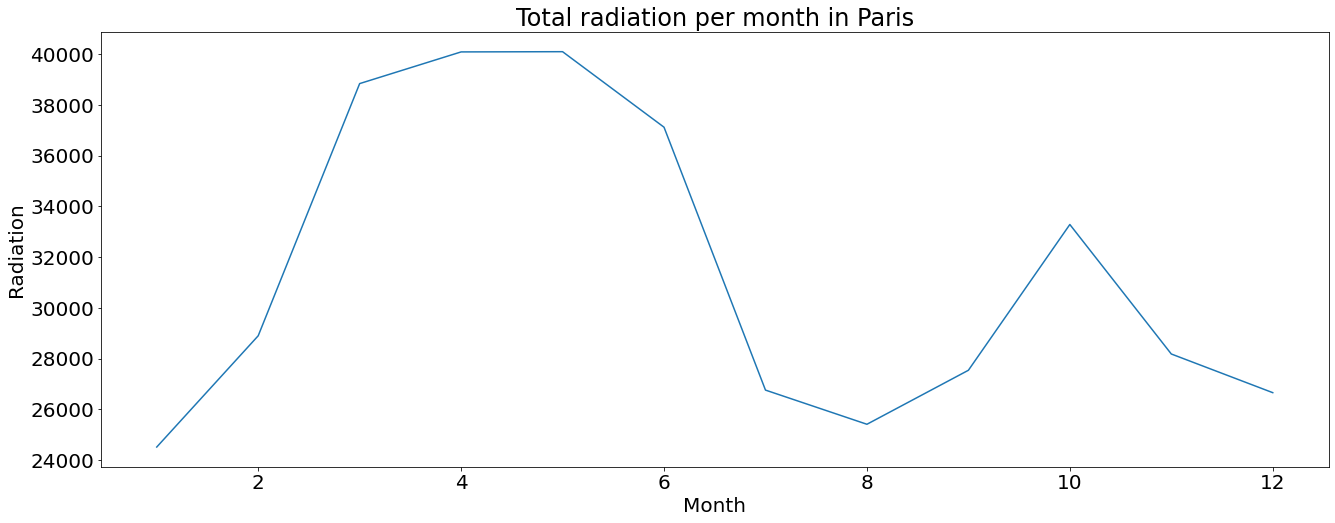

In [5]:
df['Month'] = pd.to_datetime(df['date']).dt.month
df_rad_per_month = df[['Radiation', 'Month']].groupby('Month').sum()

fig, ax = plt.subplots(1,1, figsize=(22,8))
sns.lineplot(x="Month", y="Radiation", data=df_rad_per_month, ax=ax)
ax.set_title('Total radiation per month in Paris');

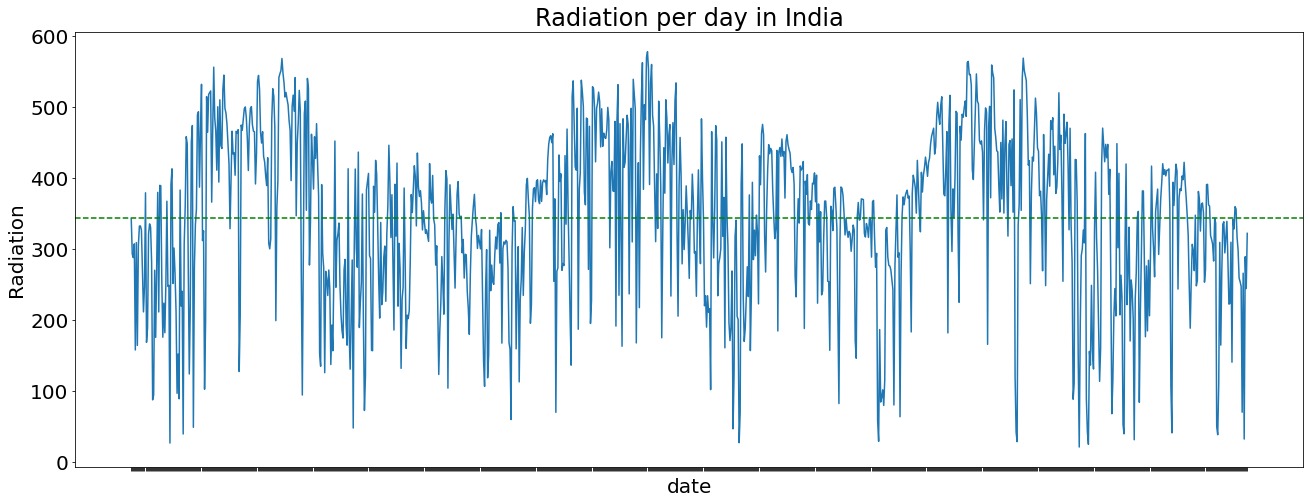

In [7]:
## Daily solar radiation plot

rad_avg = df['Radiation'].mean()

fig, ax = plt.subplots(1,1, figsize=(22,8))
sns.lineplot(x="date", y="Radiation", data=df, ax=ax)
ax.set_title('Radiation per day in India');
ax.axhline(rad_avg, color='green', linestyle='--', label=f"Mean - {rad_avg:.2f}")
ax.set(xticklabels=[]);

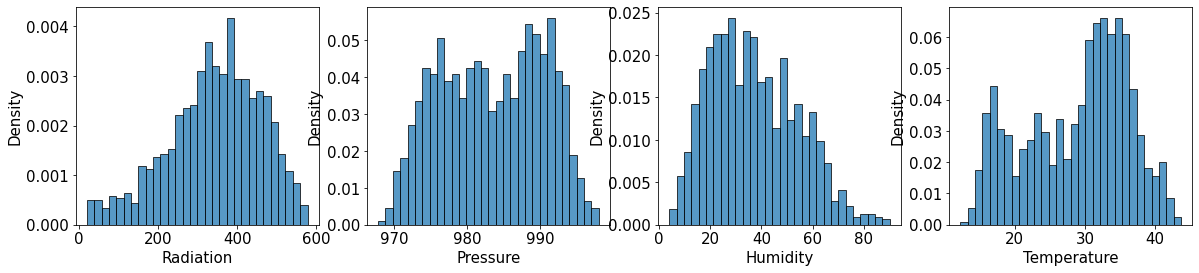

In [8]:
# Histogram distribution of weather features and solar irradiation
plt.rcParams['font.size'] = '15'
f, ax = plt.subplots(1, 4, figsize=(20,4))
sns.histplot(df['Radiation'], stat="density", bins=30, ax=ax[0])
sns.histplot(df['Pressure'], stat="density", bins=30, ax=ax[1])
sns.histplot(df['Humidity'], stat="density", bins=30, ax=ax[2])
sns.histplot(df['Temperature'], stat="density", bins=30, ax=ax[3])
plt.show()

### Correlation plot

<ipython-input-9-4251095b9269>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, annot=True, fmt=".2f", ax=ax)


<AxesSubplot:>

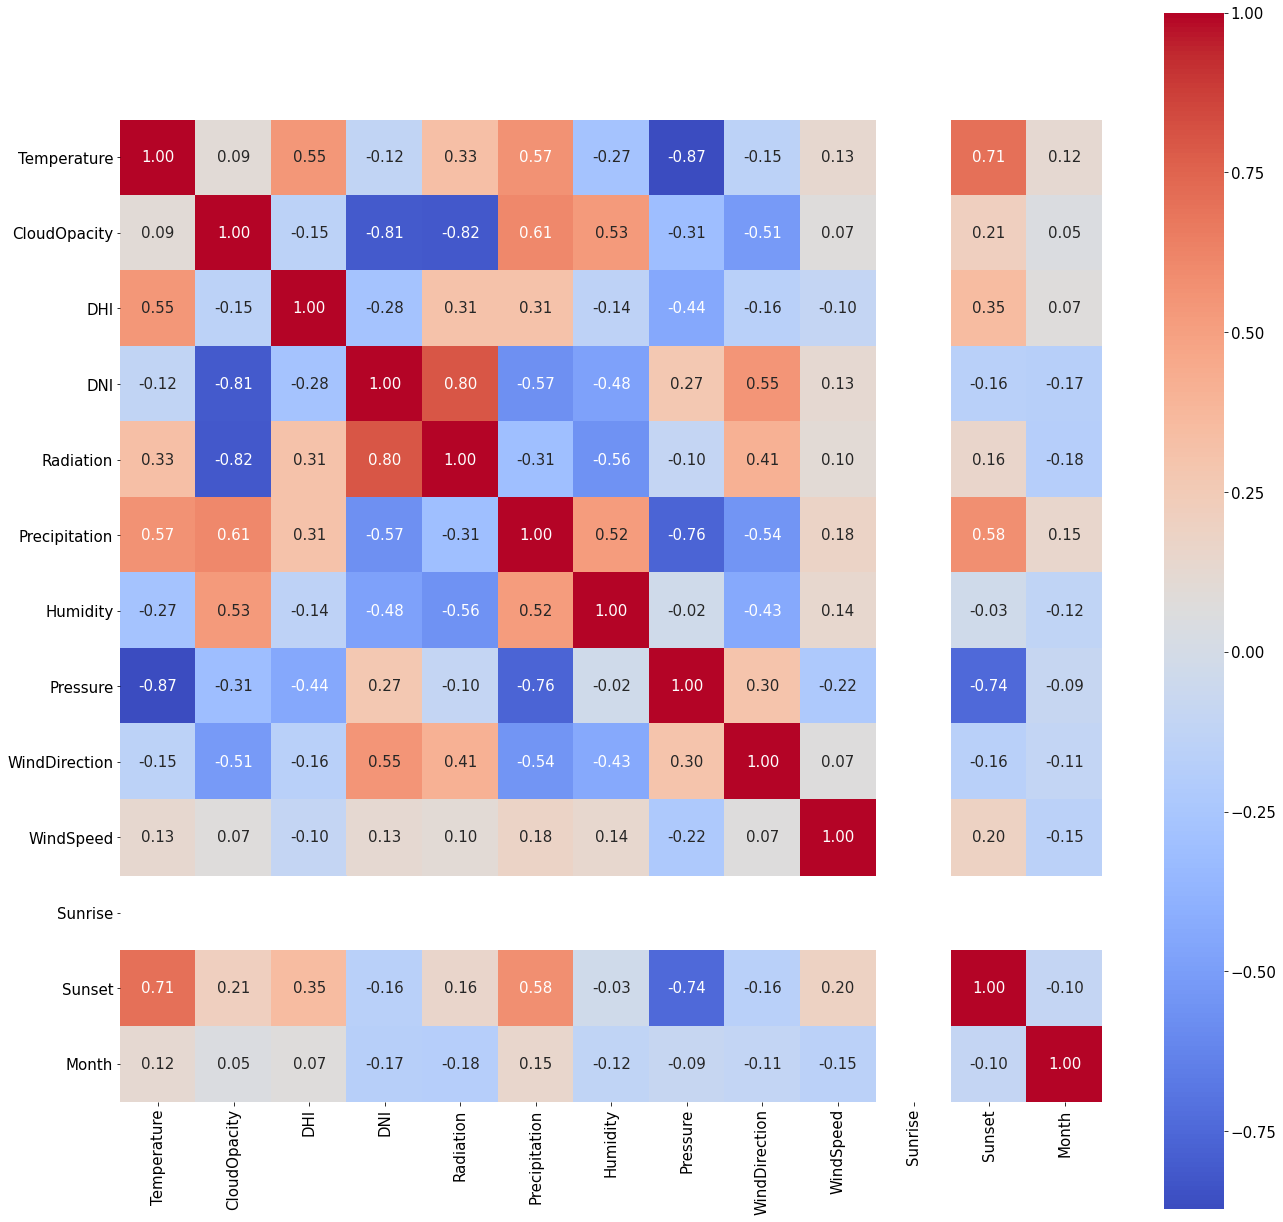

In [9]:
# feature correlation
corr= df.corr(method = "pearson")

fig, ax = plt.subplots(1, 1, figsize=(22, 22))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, annot=True, fmt=".2f", ax=ax)

In [10]:
# Adfuller testt on target feature
from statsmodels.tsa.stattools import adfuller
Xrad = df['Radiation'].values
result = adfuller(Xrad)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) # p-value <= 0.05

ADF Statistic: -4.957833
p-value: 0.000027
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
